In [89]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=10,10

We can approximate the value of PI as follows:

1. Instantiate N points in a 1x1 grid, following a random distribution
2. Calculate the number of points that lie within the quadrant of a circle with radius=1 in this 1x1 grid. This would mean the distance from origin to the coordinate is <= 1
3. The number of points estimate the area of the circle quadrant. Since the ratio of area of the circle with radius=1 to the area of the 2x2 square is `(pi*r^2) / (4 * (r*r) ) = pi / 4`, pi is estimated by `(number of points in quadrant) / (number of points in 1x1 grid) * 4`
    

In [63]:
def calculate_length(coord):
    return (coord[0]**2 + coord[1]**2)**0.5

def approximate_pi(num_samples):
    coords = np.random.rand(num_samples, 2)
    lengths = np.apply_along_axis(calculate_length, axis=1, arr=coords)
    pi_approx = len(lengths[lengths <= 1.0]) / len(lengths) * 4
    return pi_approx, coords, lengths
    

In [64]:
%%time

pi_approx, coords, lengths = approximate_pi(num_samples=1000)
print(pi_approx)

3.124
CPU times: user 3.02 ms, sys: 3.13 ms, total: 6.15 ms
Wall time: 5.86 ms


In [65]:
%%time

pi_approx, coords, lengths = approximate_pi(num_samples=10000)
print(pi_approx)

3.156
CPU times: user 24.7 ms, sys: 990 µs, total: 25.7 ms
Wall time: 24.7 ms


In [72]:
%%time

pi_approx, coords, lengths = approximate_pi(num_samples=100000)
print(pi_approx)

3.14164
CPU times: user 189 ms, sys: 18 ms, total: 207 ms
Wall time: 206 ms


In [73]:
%%time

pi_approx, coords, lengths = approximate_pi(num_samples=int(1e6))
print(pi_approx)

3.14214
CPU times: user 1.74 s, sys: 2.29 ms, total: 1.74 s
Wall time: 1.74 s


In [71]:
%%time

pi_approx, coords, lengths = approximate_pi(num_samples=int(1e7))
print(pi_approx)

3.1410728
CPU times: user 17.4 s, sys: 97.5 ms, total: 17.5 s
Wall time: 17.5 s


In [83]:
hues = []
for l in lengths:
    if l <= 1.0:
        hues.append(0)
    else:
        hues.append(1)

<AxesSubplot:>

/Users/jonathanlim/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


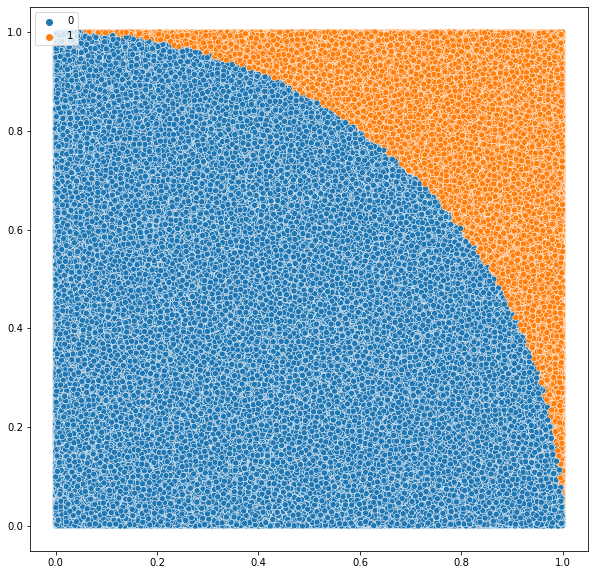

In [90]:
sns.scatterplot(x=coords[:, 0], y=coords[:, 1], hue=hues)